In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# showing original image

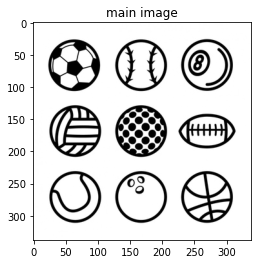

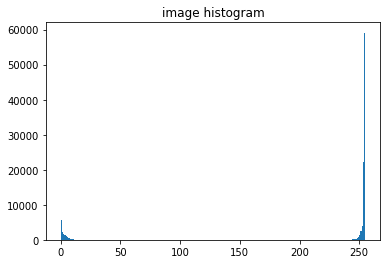

In [30]:
image = cv.imread('Balls.jpg', cv.IMREAD_GRAYSCALE )
height, width = image.shape

plt.imshow(image, 'gray')
plt.title("main image")
plt.show()

plt.hist(image.ravel(),256)
plt.title("image histogram")
plt.show()

## make image binary

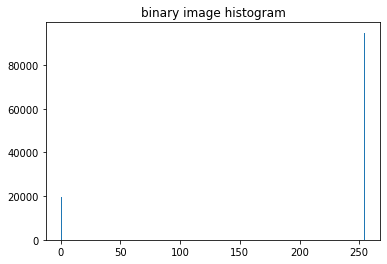

In [31]:
for h in range(height):
    for w in range(width):
        if image[h,w] > 150:
            image[h,w] = 255
        else:
            image[h,w] = 0
plt.hist(image.ravel(),256)
plt.title("binary image histogram")
plt.show()

## defining region growing function

the seed pixel is: 174 173


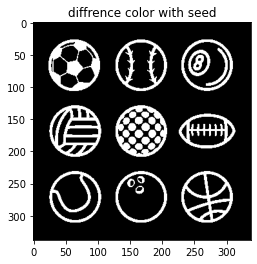

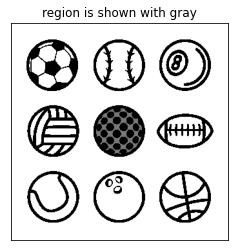

In [32]:
# mouse callback function
def region_growing(event,x,y,flags,param):
    
    # showing seed pixel
    if event == cv.EVENT_LBUTTONDBLCLK:
        print("the seed pixel is:",x,y)
        
        
        # creating diffrence image with seed pixel and source img
        img_seed_diff = np.zeros((height,width,1), np.uint8)
        
        if image[x][y] == 255:
            img_seed_diff = 255 - image
        else:
            img_seed_diff = image
            
        plt.title("diffrence color with seed")
        plt.imshow( img_seed_diff, 'gray')
        plt.show()
        

        # region growing function
        result = image 
        result[x][y] = 120
        queue = [[x,y],]
        visited = [[-1,-1],]

        while len(queue)!=0:

            x = queue[0][0]
            y = queue[0][1]
            if [x,y] not in visited:
                visited.append([x,y])

            if [x+1,y] not in visited:
                if -1<x+1<height and -1<y<width  and img_seed_diff[x+1][y] == 0 :
                    result[x+1][y] = 120
                    if [x+1,y] not in queue:
                        queue.append([x+1 , y])

            if [x-1,y] not in visited:
                if -1<x-1<height and -1<y<width  and img_seed_diff[x-1][y] == 0 :
                    result[x-1][y] = 120
                    if [x-1,y] not in queue:
                        queue.append([x-1 , y])

            if [x,y+1] not in visited:
                if -1<x<height and -1<y+1<width  and img_seed_diff[x][y+1] == 0 :
                    result[x][y+1] = 120
                    if [x,y+1] not in queue:
                        queue.append([x , y+1])


            if [x,y-1] not in visited:
                if -1<x<height and -1<y-1<width  and img_seed_diff[x][y-1] == 0 :
                    result[x][y-1] = 120
                    if [x,y-1] not in queue:
                        queue.append([x , y-1])

            queue.remove([x,y])



        # shoeing result
        plt.imshow(result, 'gray')
        plt.xticks([]),plt.yticks([])
        plt.title("region is shown with gray")
        plt.show()


# Create a window and bind the function to window
cv.namedWindow('plz select one seed!')
cv.setMouseCallback('plz select one seed!',region_growing)

while(1):
    cv.imshow('plz select one seed!',image)
    if cv.waitKey(20) & 0xFF == 27:
        break
        
cv.destroyAllWindows()